In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/YOLOv8/plantDisease

/content/drive/MyDrive/YOLOv8/plantDisease


In [ ]:
#Ultralytics' i indir
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [ ]:
!unzip data/plant_disease.zip -d ./data

Archive:  data/plant_disease.zip
   creating: ./data/plant_disease/images/
   creating: ./data/plant_disease/images/test/
  inflating: ./data/plant_disease/images/test/1001.jpg  
  inflating: ./data/plant_disease/images/test/1017.jpg  
  inflating: ./data/plant_disease/images/test/1033.jpg  
  inflating: ./data/plant_disease/images/test/1034.jpg  
  inflating: ./data/plant_disease/images/test/1048.jpg  
  inflating: ./data/plant_disease/images/test/1057.jpg  
  inflating: ./data/plant_disease/images/test/108.jpg  
  inflating: ./data/plant_disease/images/test/1081.jpg  
  inflating: ./data/plant_disease/images/test/1107.jpg  
  inflating: ./data/plant_disease/images/test/1111.jpg  
  inflating: ./data/plant_disease/images/test/1116.jpg  
  inflating: ./data/plant_disease/images/test/1121.jpg  
  inflating: ./data/plant_disease/images/test/1122.jpg  
  inflating: ./data/plant_disease/images/test/113.jpg  
  inflating: ./data/plant_disease/images/test/1133.jpg  
  inflating: ./data/plant

In [ ]:
#Training

!yolo detect train data=data/config.yaml model=yolov8n.pt epochs=25 imgsz=512 workers=8 batch=8 name=yolov8_plant_disease_detection

Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/config.yaml, epochs=25, patience=50, batch=8, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_plant_disease_detection2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None

In [ ]:
#Predict 1

!yolo detect predict model=runs/detect/yolov8_plant_disease_detection2/weights/best.pt source=inference save=True

Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007403 parameters, 0 gradients, 8.1 GFLOPs

image 1/175 /content/drive/MyDrive/YOLOv8/plantDisease/inference/1001.jpg: 512x512 1 Blueberry Healthy, 6.2ms
image 2/175 /content/drive/MyDrive/YOLOv8/plantDisease/inference/1017.jpg: 512x512 5 Blueberry Healthys, 32.7ms
image 3/175 /content/drive/MyDrive/YOLOv8/plantDisease/inference/1033.jpg: 512x512 1 Blueberry Healthy, 7.3ms
image 4/175 /content/drive/MyDrive/YOLOv8/plantDisease/inference/1034.jpg: 512x512 1 Blueberry Healthy, 6.1ms
image 5/175 /content/drive/MyDrive/YOLOv8/plantDisease/inference/1048.jpg: 512x512 1 Tomato Mold Leaf, 6.4ms
image 6/175 /content/drive/MyDrive/YOLOv8/plantDisease/inference/1057.jpg: 512x512 1 Blueberry Healthy, 6.9ms
image 7/175 /content/drive/MyDrive/YOLOv8/plantDisease/inference/108.jpg: 512x512 3 Tomato Leafs, 6.9ms
image 8/175 /content/drive/MyDrive/YOLOv8/plantDisease/inference/10


0: 512x512 1 Tomato Early Blight Leaf, 7.9ms
Speed: 1.3ms preprocess, 7.9ms inference, 13.9ms postprocess per image at shape (1, 3, 512, 512)


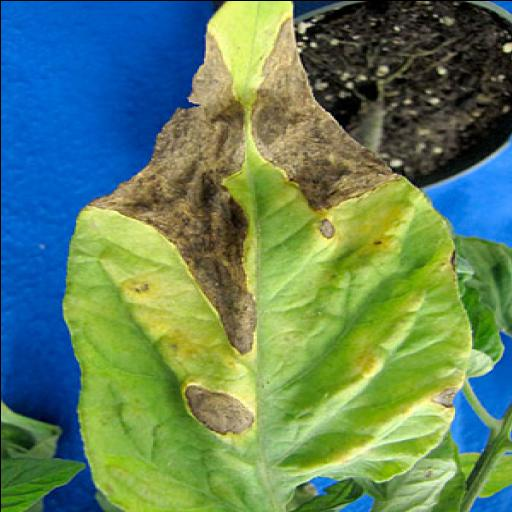

In [ ]:
#Predict 2

import cv2
import imutils
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

font = cv2.FONT_HERSHEY_SIMPLEX

img_path = "inference/336.jpg"
model_path = "runs/detect/yolov8_plant_disease_detection2/weights/best.pt"

img = cv2.imread(img_path)
model = YOLO(model_path)

results = model(img)[0]


threshold = 0.5  #skor sınırı belirledik
for result in results.boxes.data.tolist():
  x1, y1, x2, y2, score, class_id = result
  x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)

  if score > threshold:
    cv2.rectangle(img, (x1,y1), (x2,y2), (0,0,255), 4)

    class_name = results.names[class_id]
    score = score*100
    text = f"{class_name}: %{score: .2f}"
    cv2.putText(img, text, (x1, y1-10), font, 0.5, (0,0,255), 1, cv2.LINE_AA)

cv2_imshow(img)
